In [2]:
%run ../methodes/decision_tree_definition.ipynb import Decision_Tree_
import pandas as pd

# On récupère le dataframe d'entraînement stocké en mémoire
%store -r df_train

In [3]:
# Le terme de régularisation (penalty) est l'une des 3 fonctions suivantes
criterions = ['gini', 'entropy', 'log_loss']

# Le coût minimum de complexité d'élagage doit être un réel non-négatif
ccp_alphas = np.logspace(-5, -2, 10)


In [4]:
# Initialisation des meilleurs paramètres
err_min = 100
decision_tree_best_criterion = 'Nothing'
decision_tree_best_ccp_alpha = -1

In [5]:
# Initialisation des tableaux pour l'analyse des données
df_dt_train = pd.DataFrame(0, index=criterions, columns=ccp_alphas)
df_dt_test = pd.DataFrame(0, index=criterions, columns=ccp_alphas)

In [6]:
%%capture --no-display
%run utils.ipynb import K_Fold

for criterion in criterions:
    for ccp_alpha in ccp_alphas:
        
        # Validation croisée avec K_Fold
        err_train, err_test = K_Fold(10, df_train, Decision_Tree_(criterion, ccp_alpha))

        # Calcul de l'erreur totale
        err = (err_train + err_test) / 2 

        # On garde les données en mémoire
        df_dt_train[ccp_alpha][criterion] = err_train
        df_dt_test[ccp_alpha][criterion] = err_test
                
        # On met à jour les meilleurs hyperparamètres
        if err < err_min:
            err_min = err
            decision_tree_best_criterion = criterion
            decision_tree_best_ccp_alpha = ccp_alpha     

Text(0.5, 1.0, 'log loss')

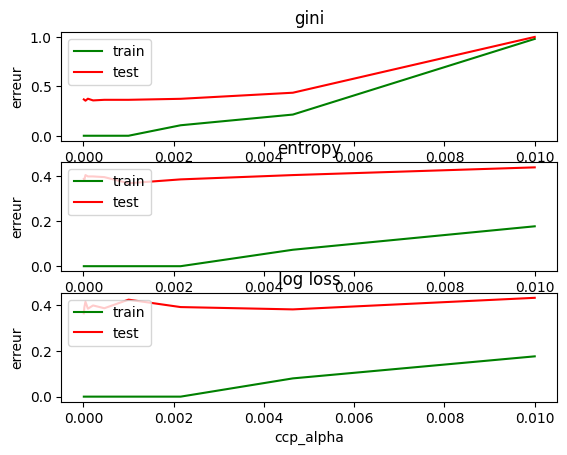

In [7]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction du learning rate
plt.subplot(3,1,1) # gini
plot_df(df_dt_train.loc['gini'], df_dt_test.loc['gini'], 'ccp_alpha', 'index', False)
plt.title('gini')

plt.subplot(3,1,2) # entropy
plot_df(df_dt_train.loc['entropy'], df_dt_test.loc['entropy'], 'ccp_alpha', 'index', False)
plt.title('entropy')

plt.subplot(3,1,3) # log_loss
plot_df(df_dt_train.loc['log_loss'], df_dt_test.loc['log_loss'], 'ccp_alpha', 'index', False)
plt.title('log loss')

In [8]:
# Affichage des meilleurs hyperparamètres trouvés
print('err_min : ', err_min, ' | criterion : ', decision_tree_best_criterion, 
      ' | ccp_alpha : ', decision_tree_best_ccp_alpha)

err_min :  0.17727272727272728  | criterion :  gini  | ccp_alpha :  4.641588833612782e-05


In [9]:
# On stocke en mémoire les meilleurs hyperparamètres trouvés
%store decision_tree_best_criterion
%store decision_tree_best_ccp_alpha

Stored 'decision_tree_best_criterion' (str)
Stored 'decision_tree_best_ccp_alpha' (float64)


In [10]:
print(df_dt_test)

          0.000010  0.000022  0.000046  0.000100  0.000215  0.000464  \
gini      0.367677  0.364646  0.354545  0.374747  0.357576  0.363636   
entropy   0.388889  0.384848  0.406061  0.400000  0.400000  0.396970   
log_loss  0.363636  0.389899  0.414141  0.383838  0.397980  0.385859   

          0.001000  0.002154  0.004642  0.010000  
gini      0.363636  0.373737  0.435354  1.000000  
entropy   0.369697  0.386869  0.406061  0.440404  
log_loss  0.423232  0.390909  0.380808  0.431313  
